In [164]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Collect csv in pd.DataFrame

In [165]:
data = pd.read_csv('../log/messageLog.csv')

Count different news and froup in a list called `listNews`

In [166]:
listNews = data.groupby('#n').nunique().index.tolist()

Determine max time of iteration

In [167]:
maxTimeIteration = data.max()['#t']

Cut useless info from database

In [168]:
cuttedData = data[['#n', '#1', '#2', '#t']]

Regroup data for name of the news listed before

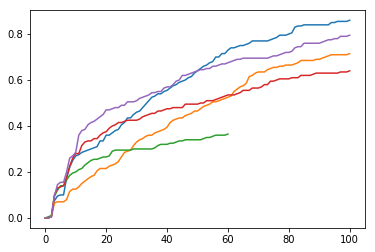

In [169]:
for news in listNews:
    cuttedSingleData = cuttedData.loc[cuttedData['#n'] ==  news]
    temp = {}
    arr = np.zeros([1])
    time = 0
    for index, row in cuttedSingleData.iterrows():
        if row['#1'] in range(0, 4, 1):
            pass
        else:
            temp[row['#1']] = 1
        if row['#2'] in range(0, 4, 1):
            pass
        else:
            temp[row['#2']] = 1
        if time < row['#t']:
            arr = np.append(arr, len(temp)/200)
            time = time + 1
    plot(arr)

Count number of diffusion with no duplicates

In [237]:
cuttedSingleData = cuttedData.loc[cuttedData['#n'] ==  listNews[0]]
len(cuttedSingleData[cuttedSingleData['#t'] == 1])
#cuttedSingleData.value_counts()
#len(cuttedSingleData['#t'] == 1)

1

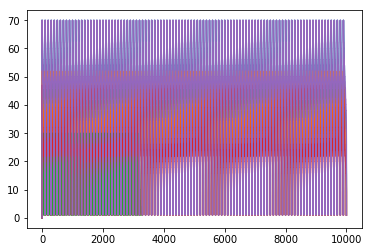

In [216]:
for news in listNews:
    cuttedSingleData = cuttedData.loc[cuttedData['#n'] ==  news]
    arr = np.zeros([1])
    for i in range(len(cutlen)):
        arr = np.append(arr, cutlen)
    plot(arr)